### Diabetes -US Hospitals for Years 1999-2008

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge. The problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide proper diabetes care not only increases the managing costs for the hospitals (as the patients are readmitted) but also impacts the morbidity and mortality of the patients, who may face complications associated with diabetes.

#### Importing Liabraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#### Loading Dataset 

In [125]:
df=pd.read_csv("C:\\Users\\nikhi\\OneDrive\\Desktop\\project\\diabetic_data.csv")

In [126]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


#### Initial informations about the dataset

In [127]:
#Displaying first five rows of the dataset
print('The first five rows of the dataset:')
df_rows=df.head()
for index,rows in df_rows.iterrows():
    print(f'Rows{index+1}:') #The index label of the current row
    print(rows) #printing the content of the current row
    print('----------------------------')#printing a seperate line

The first five rows of the dataset:
Rows1:
encounter_id                                 2278392
patient_nbr                                  8222157
race                                       Caucasian
gender                                        Female
age                                           [0-10)
weight                                             ?
admission_type_id                                  6
discharge_disposition_id                          25
admission_source_id                                1
time_in_hospital                                   1
payer_code                                         ?
medical_specialty           Pediatrics-Endocrinology
num_lab_procedures                                41
num_procedures                                     0
num_medications                                    1
number_outpatient                                  0
number_emergency                                   0
number_inpatient                                   0
dia

In [128]:
#The shape of the dataset
print('The shape of the dataset:',df.shape)
num_rows,num_cols=df.shape
print(f'Number of rows:{num_rows}')
print(f'Number of columns:{num_cols}')

The shape of the dataset: (101766, 50)
Number of rows:101766
Number of columns:50


In [129]:
#Basic informations from the dataset like Column names,datatypes and nonnull values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [130]:
#Descriptive statistics of numerical variables only
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.020000e+00,1.450000e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.720000e+00,5.280000e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.750000e+00,4.060000e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.400000e+00,2.990000e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.310000e+01,1.967000e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.340000e+00,1.710000e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602000e+01,8.130000e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.700000e-01,1.270000e+00,0.0,0.0,0.0,0.000000e+00,42.0


- **count =** The number of non-null values.
- **mean =** Avarage.
- **Standard Deviation (std)=** A measure of the spread of the variable's values around the mean. A higher standard deviation indicates greater variability in the data.
- **min =** The smallest value. 
- **25% =** It represents the value below which 25% of the data fall
- **50% =** It represents the value below which 50% of the data fall
- **75% =** It represents the value below which 75% of the data fall
- **max =** The largest value.

In [131]:
#Descriptive analysis of categorical variables only
df.describe(include=object).T.round(2)

,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
payer_code,101766,18,?,40256
medical_specialty,101766,73,?,49949
diag_1,101766,717,428,6862
diag_2,101766,749,276,6752
diag_3,101766,790,250,11555
max_glu_serum,5346,3,Norm,2597


# <font color="#686868" size="8"> Data Exploration(EDA) 🔍</font>

Exploratory Data Analysis (EDA), is an essential step in the machine learning pipeline. It involves **examining** and **visualizing the characteristics of a dataset to gain insights**, **understand patterns**, **detect anomalies**, and **prepare the data for further analysis** and **modeling**. some common techniques used in data exploration:
- Data Visualization
- Data Cleaning
- Data Preprocessing

# <font color="#4863A0"> Data Visualization

Creating visual representations such as **histograms**,**scatter plots**, **box plots**, and **heatmaps** to explore the distribution, relationships, and trends within the dataset. Visualization aids in identifying **patterns**, **correlations**, and **potential insights** that may not be apparent from just looking at the raw data. there are some ways to discover it:
- Graphical Analysis
    - Bar Charts
    - Pie Charts 
    - Histograms
- Correlation Analysis
- Data Relationships Analysis

##### Graphycal analysis

In [132]:
#Removing unwanted columns
df_new=df.drop(columns=[])
#From the Descriptive analysis of categorical variables its noticable that some columns has many missing/NaN values
print(df['weight'].value_counts(dropna=False))
print('--------------')
print(df['payer_code'].value_counts(dropna=False))
print('--------------')
print(df['medical_specialty'].value_counts(dropna=False))
print('--------------')
print(df['max_glu_serum'].value_counts(dropna=False))
print('--------------')
df['A1Cresult'].value_counts(dropna=False)

weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64
--------------
payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64
--------------
medical_specialty
?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: count, Length: 73, dtype: int64
---------

A1Cresult
NaN     84748
>8       8216
Norm     4990
>7       3812
Name: count, dtype: int64

Deleting the columns- **'Weight',payer_code&medical_specialty' because,max_glu_serum,A1Cresult**  in the this column more than 75% of data is missing

In [133]:
#Deleting some columns related to patient id which is unnecessary to the model building
df_new=df.drop(columns=['weight','payer_code','medical_specialty','max_glu_serum','A1Cresult','encounter_id','patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id','time_in_hospital','num_procedures','diag_1','diag_2','diag_3'],axis=1)

In [134]:
#Gender analysis
gender_analysis=df_new['gender'].value_counts(dropna=False)
print(gender_analysis)

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64


In [135]:
#Replacing unknown/invalid with NaN in Gender
df_new['gender'].replace(r'Unknown/Invalid',np.nan,inplace=True)

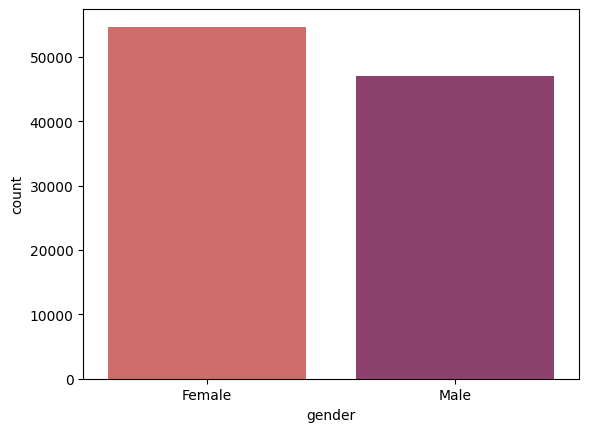

In [136]:
#bar chart analysis for 'gender' feature
sns.countplot(x='gender',data=df_new,palette='flare')
plt.show()

In [137]:
#Age analysis
df_new['age'].value_counts(dropna=False)

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

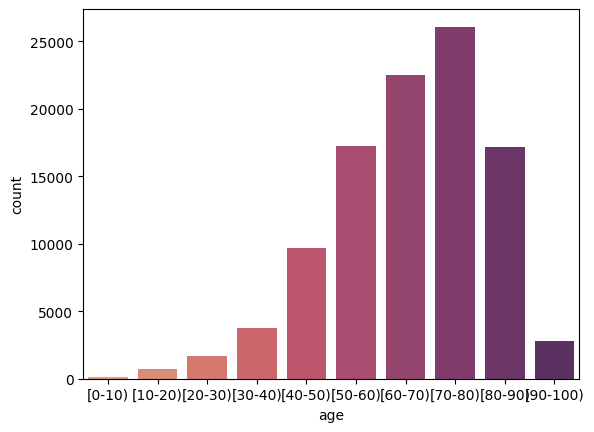

In [138]:
#Bar chart analysis for 'Age' feature
sns.countplot(x='age',data=df_new,palette='flare')
plt.show()

In [139]:
df_new['race'].value_counts(dropna=False)

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [140]:
#Race column is about continent and its also has missing values
df_new=df_new.drop(columns=['race'])

In [141]:
#Analysis and pie chart of some of the features in the dataset
print(df_new['metformin'].value_counts(dropna=False))
print('------------------')
print(df_new['repaglinide'].value_counts(dropna=False))
print('------------------')
print(df_new['nateglinide'].value_counts(dropna=False))
print('------------------')
print(df_new['chlorpropamide'].value_counts(dropna=False))
print('------------------')
print(df_new['glimepiride'].value_counts(dropna=False))
print('------------------')
print(df_new['acetohexamide'].value_counts(dropna=False))
print('------------------')
print(df_new['glipizide'].value_counts(dropna=False))
print('------------------')
print(df_new['glyburide'].value_counts(dropna=False))
print('------------------')
print(df_new['tolbutamide'].value_counts(dropna=False))
print('------------------')
print(df_new['pioglitazone'].value_counts(dropna=False))
print('------------------')
print(df_new['rosiglitazone'].value_counts(dropna=False))
print('------------------')
print(df_new['miglitol'].value_counts(dropna=False))
print('------------------')
print(df_new['troglitazone'].value_counts(dropna=False))
print('------------------')
print(df_new['tolazamide'].value_counts(dropna=False))
print('------------------')
print(df_new['examide'].value_counts(dropna=False))
print('------------------')
print(df_new['citoglipton'].value_counts(dropna=False))
print('------------------')
print(df_new['insulin'].value_counts(dropna=False))

metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64
------------------
repaglinide
No        100227
Steady      1384
Up           110
Down          45
Name: count, dtype: int64
------------------
nateglinide
No        101063
Steady       668
Up            24
Down          11
Name: count, dtype: int64
------------------
chlorpropamide
No        101680
Steady        79
Up             6
Down           1
Name: count, dtype: int64
------------------
glimepiride
No        96575
Steady     4670
Up          327
Down        194
Name: count, dtype: int64
------------------
acetohexamide
No        101765
Steady         1
Name: count, dtype: int64
------------------
glipizide
No        89080
Steady    11356
Up          770
Down        560
Name: count, dtype: int64
------------------
glyburide
No        91116
Steady     9274
Up          812
Down        564
Name: count, dtype: int64
------------------
tolbutamide
No        101743
Steady        23
Name:

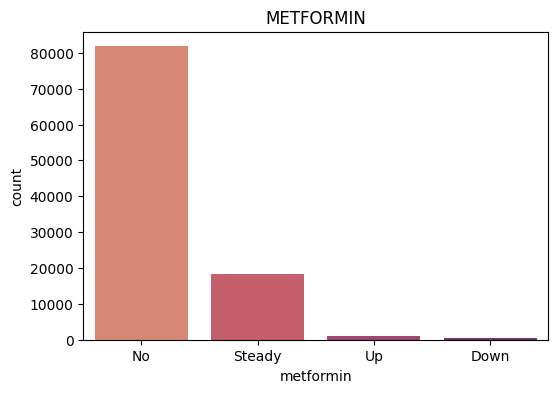

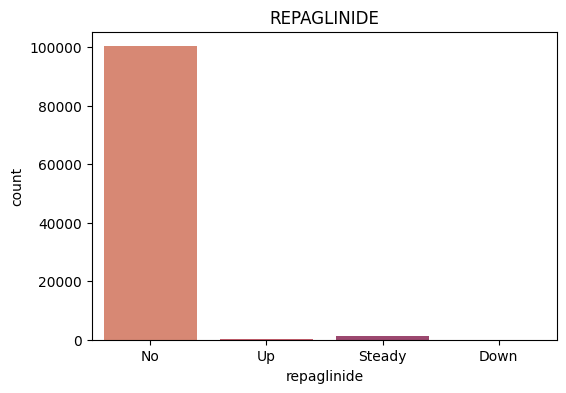

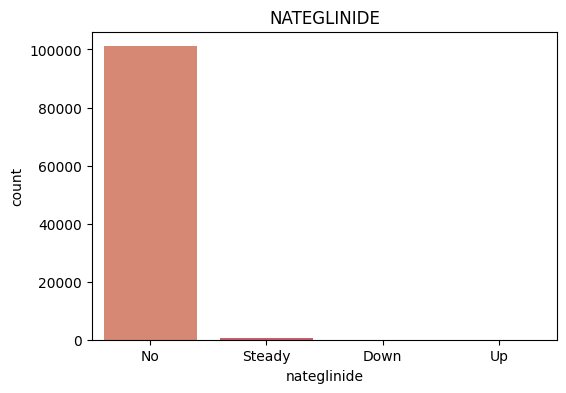

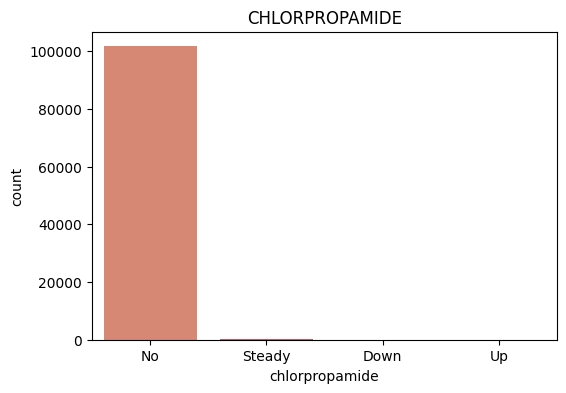

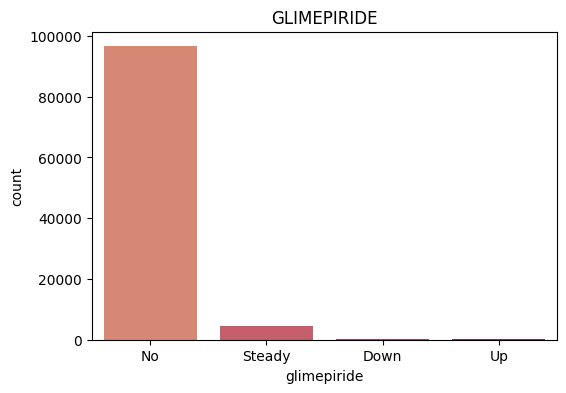

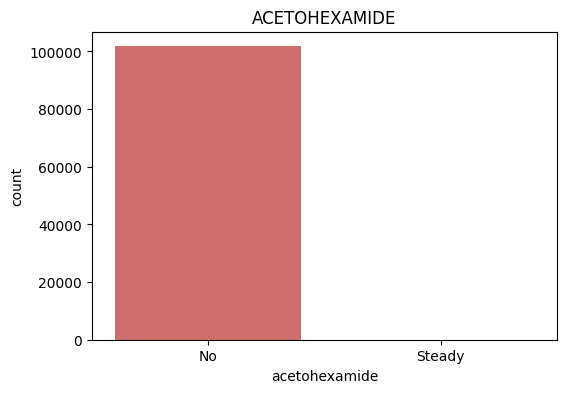

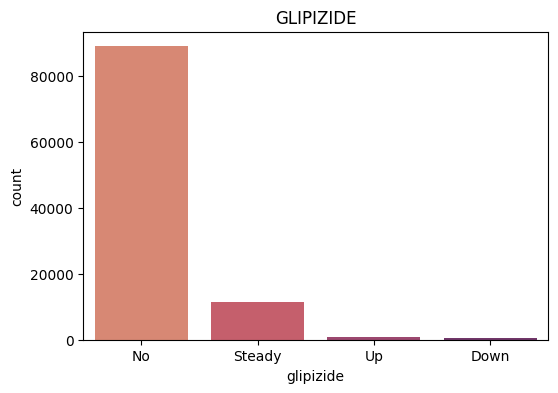

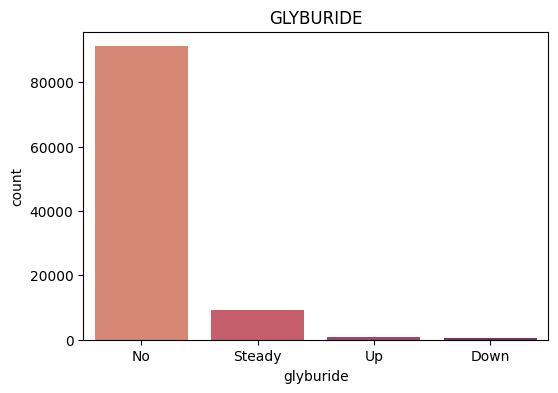

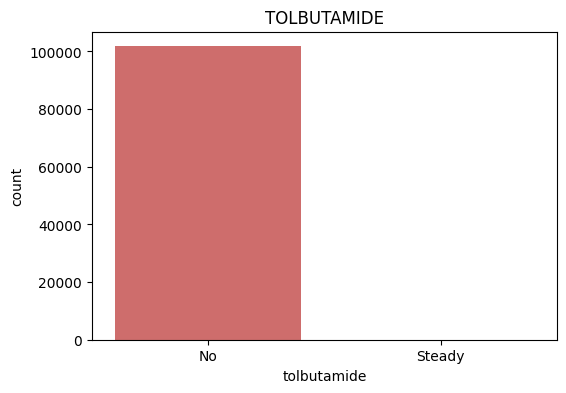

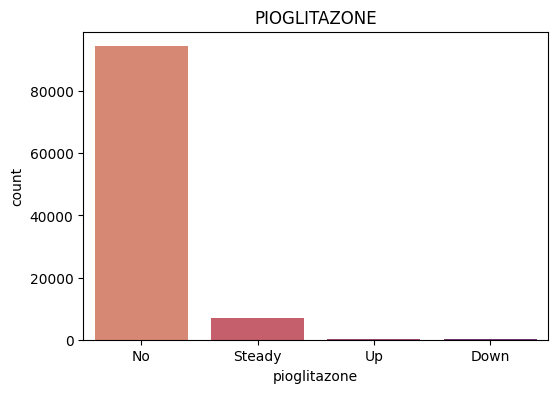

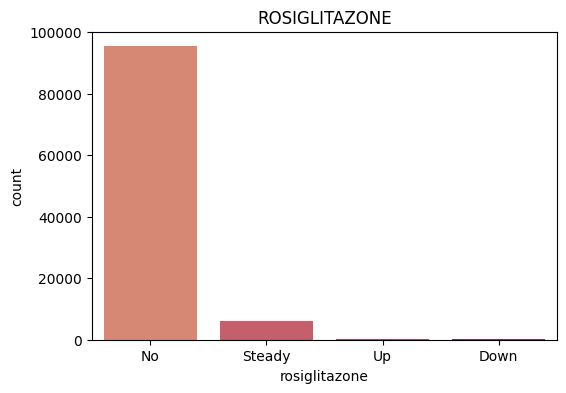

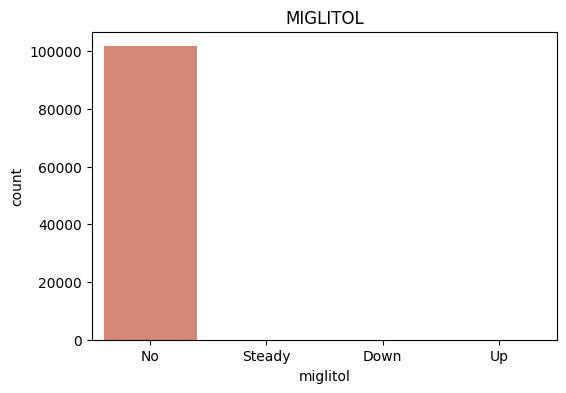

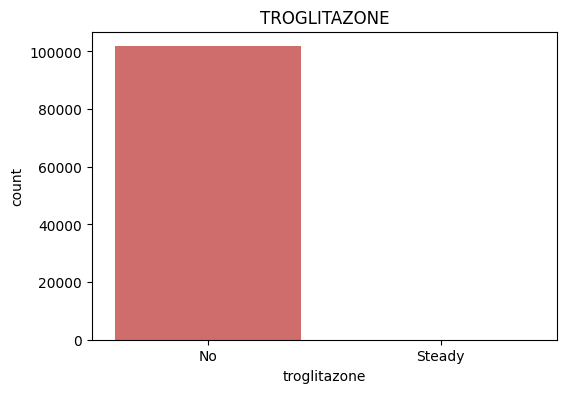

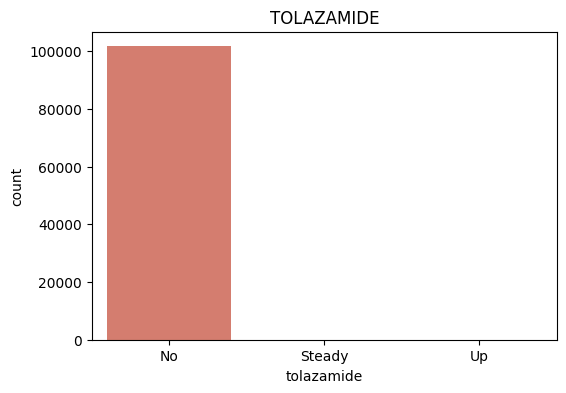

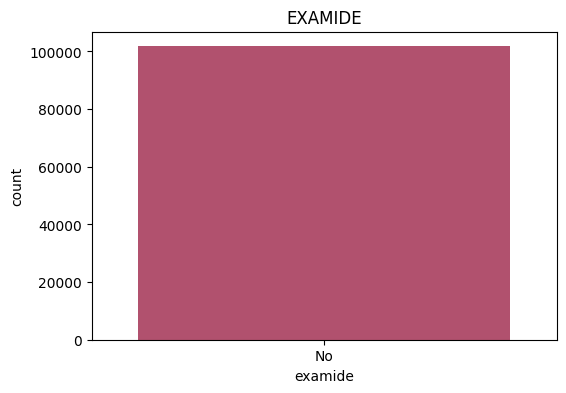

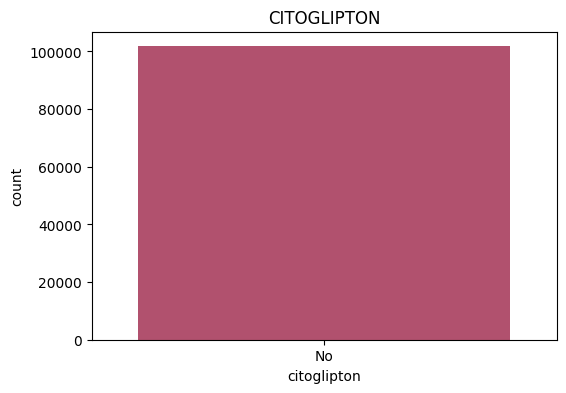

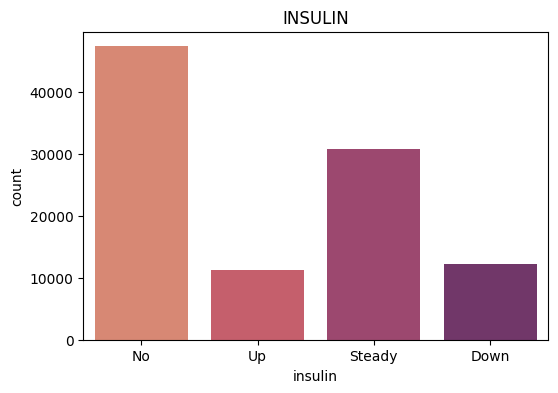

In [142]:
def f(i):
    plt.figure(figsize=(6,4))
    sns.countplot(x=i,data=df_new,palette='flare')
    plt.title(i.upper())
    plt.show()
    return
f('metformin')
f('repaglinide')
f('nateglinide')
f('chlorpropamide')
f('glimepiride')
f('acetohexamide')
f('glipizide')
f('glyburide')
f('tolbutamide')
f('pioglitazone')
f('rosiglitazone')
f('miglitol')
f('troglitazone')
f('tolazamide')
f('examide')
f('citoglipton')
f('insulin')

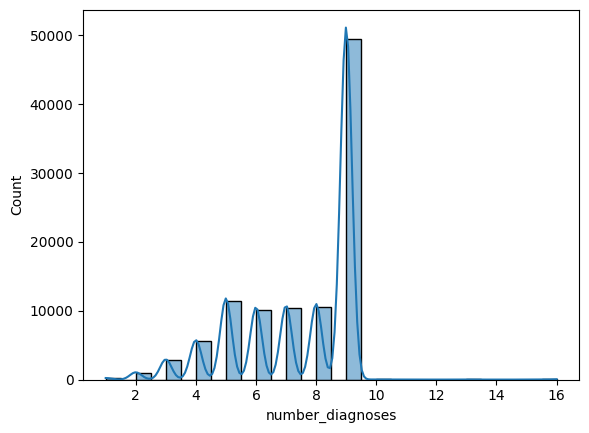

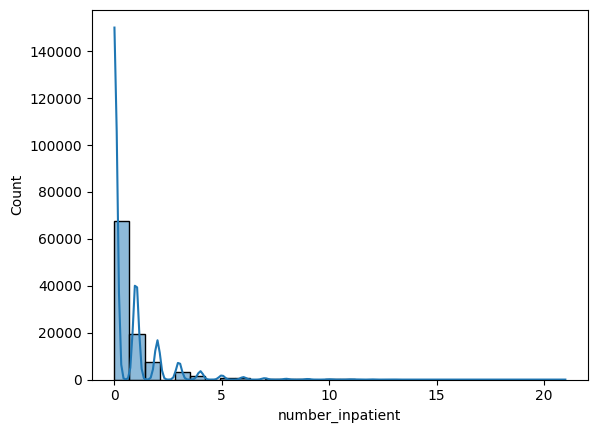

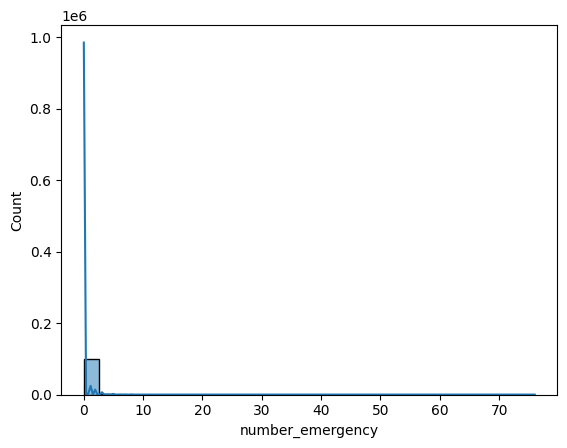

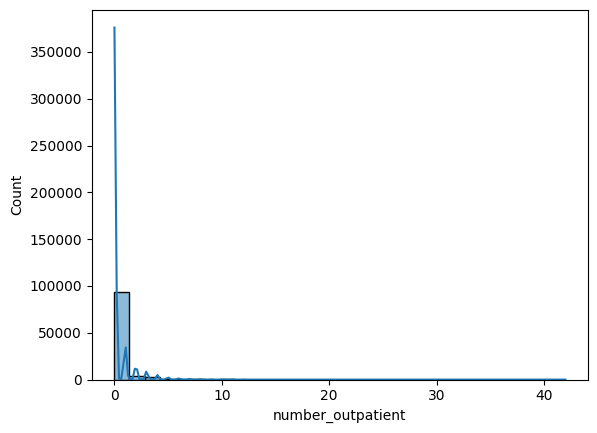

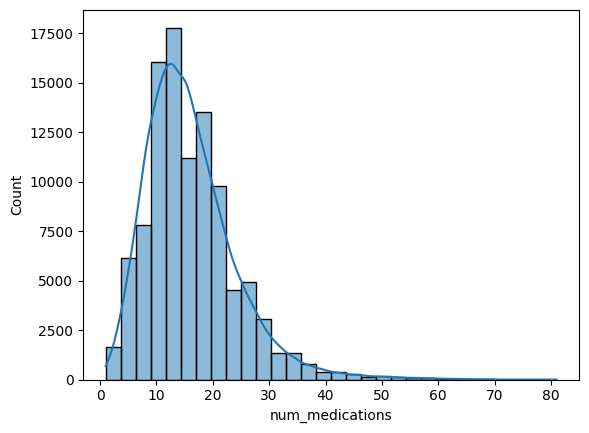

ValueError: Could not interpret value `num_procedures` for `x`. An entry with this name does not appear in `data`.

In [143]:
#Histogram distribution of numerical values, the distribution of histogram is also helps to find if there is outliers or not
def n(i):
    sns.histplot(data=df_new,x=i,bins=30,kde=True)
    plt.show()
    return
n('number_diagnoses')
n('number_inpatient')
n('number_emergency')
n('number_outpatient')
n('num_medications')
n('num_procedures')
n('num_lab_procedures')

From the above analysis **Number of lab procedures**,**Number of medications**,**number_outpatient**,**number_emergency**,**number_inpatient** are posetively skewed. **number_diagnoses** is negatively skewed. All has outliers

In [ ]:
#Checking the correlation using heatmap
#First of all correlation between numeric variables
numeric_corr=df_new[['number_diagnoses','number_inpatient','number_emergency','number_outpatient','num_medications','num_lab_procedures']]
sns.heatmap(numeric_corr.corr(),annot=True,square=True,cmap='coolwarm')
plt.show()

**Looks like the numerical variables are independant to each other**

# <font color="#4863A0"> Data Cleaning 🧹</font>
Data cleaning refers to the process of **identifying**, **correcting**, and **removing errors**, **inconsistencies**, and **inaccuracies** from a dataset. It involves transforming raw data into a clean and structured format that is suitable for analysis, modeling, and other data-related tasks, including:
- Remove Unneeded Features
- Handling Missing Values
- Encoding Categorical Variables
- Handling Outliers
- Handling Duplicates

Already removed unwanted columns 

## <font size="4" face="WildWest">2. Handling Missing Values</font>

**Missing values** are data points that are absent or not recorded for certain variables in a dataset. This can happen because of mistakes such as data entry errors, equipment failures, or simply because the information is not available.

 **How to detect missing values?**
 - Look for blank cells and use data analysis tools that can identify missing values like .isnull() functoin.

 **Decision options:**
1. Keep them 
    - Not ideal, as missing values can lead to biased analyses and inaccurate predictions.
2. Reassign new values to them (Using specific techniques)
    - Imputation (Y):
        - Replace missing values with estimated or calculated values based on the available data. This can be done using various methods such as:
            1. **Mean/Median Imputation:** Replace with the average (mean) or middle value (median) for numerical data.
            2. **Mode Imputation:** Replace with the most frequent value.
    - Forward/Backward Fill (N):
        - For time-series data, missing values can be filled with the last observed value (forward fill) or the next observed value (backward fill).
    - Interpolation (N):
        - Estimate missing values based on the trend or pattern observed in the existing data points.
3. Delete them (Sometimes necessary, especially if missing values are extensive and cannot be reasonably imputed without introducing significant bias.)

In [ ]:
null_values=df_new.isnull().sum()
print(null_values)

***There is no major null or missing values***

**Encoding categorical variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [146]:
label_encoder=LabelEncoder()
def label(i):
    print(df_new[i].value_counts(dropna=False))
    df_new[i]=label_encoder.fit_transform(df_new[i])
    print(df_new[i].value_counts(dropna=False))
    print('-------------')
    return
label('gender')
label('age')
label('metformin')
label('repaglinide')
label('nateglinide')
label('chlorpropamide')
label('glimepiride')
label('acetohexamide')
label('glipizide')
label('glyburide')
label('tolbutamide')
label('pioglitazone')
label('rosiglitazone')
label('acarbose')
label('miglitol')
label('troglitazone')
label('tolazamide')
label('examide')
label('citoglipton')
label('insulin')
label('glyburide-metformin')
label('glipizide-metformin')
label('glimepiride-pioglitazone')
label('metformin-rosiglitazone')
label('metformin-pioglitazone')
label('change')
label('diabetesMed')


gender
Female    54708
Male      47055
NaN           3
Name: count, dtype: int64
gender
0    54708
1    47055
2        3
Name: count, dtype: int64
-------------
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64
age
7    26068
6    22483
5    17256
8    17197
4     9685
3     3775
9     2793
2     1657
1      691
0      161
Name: count, dtype: int64
-------------
metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64
metformin
1    81778
2    18346
3     1067
0      575
Name: count, dtype: int64
-------------
repaglinide
No        100227
Steady      1384
Up           110
Down          45
Name: count, dtype: int64
repaglinide
1    100227
2      1384
3       110
0        45
Name: count, dtype: int64
-------------
nateglinide
No        101063
Steady       668
Up            24
Down        

In [147]:
#Transforming target variable
print(df_new['readmitted'].value_counts(dropna=False))
df_new['readmitted']=label_encoder.fit_transform(df['readmitted'])
print(df_new['readmitted'].value_counts(dropna=False))

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64
readmitted
2    54864
1    35545
0    11357
Name: count, dtype: int64


## <font size="4" face="WildWest">4. Handling Outliers</font>

**Outliers** are data points that significantly differ from the rest of the observations in a dataset, often due to errors in data collection or genuine extreme values.

 **How to detect outliers?**
- Visualization data (Numerical values)

 **Decision options:**
1. Keep them - Not a good solution.
2. Reassign new values to them (Using specific techniques)
    - Capping Outliers (N)
        - Instead of removing outliers entirely, replace extreme values with more reasonable thresholds.
    - Robust Scaling (Y)
        - Use scaling methods less sensitive to outliers (e.g., IQR scaling, standardization with robust estimators).
            - Robust Scaling Function
            - IQR scaling
    - Replace with mean (N)
        - Replacing the outliers with the mean value
3. Delete them (N)

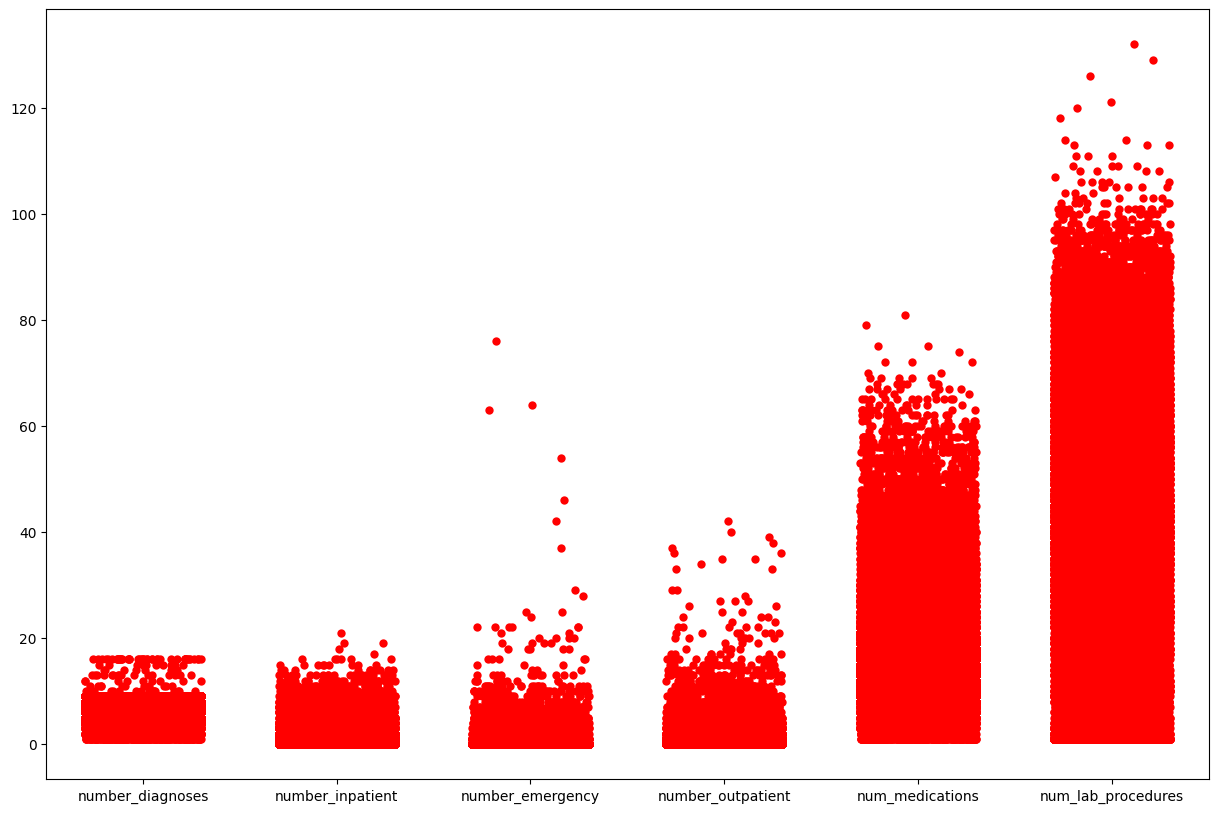

In [148]:
#Checking the outliers of numerical variables using stripplot
numerical_outliers=df_new[['number_diagnoses','number_inpatient','number_emergency','number_outpatient','num_medications','num_lab_procedures']]
plt.figure(figsize=(15,10))
sns.stripplot(data=numerical_outliers,color='red',jitter=0.3,size=6)
plt.show()

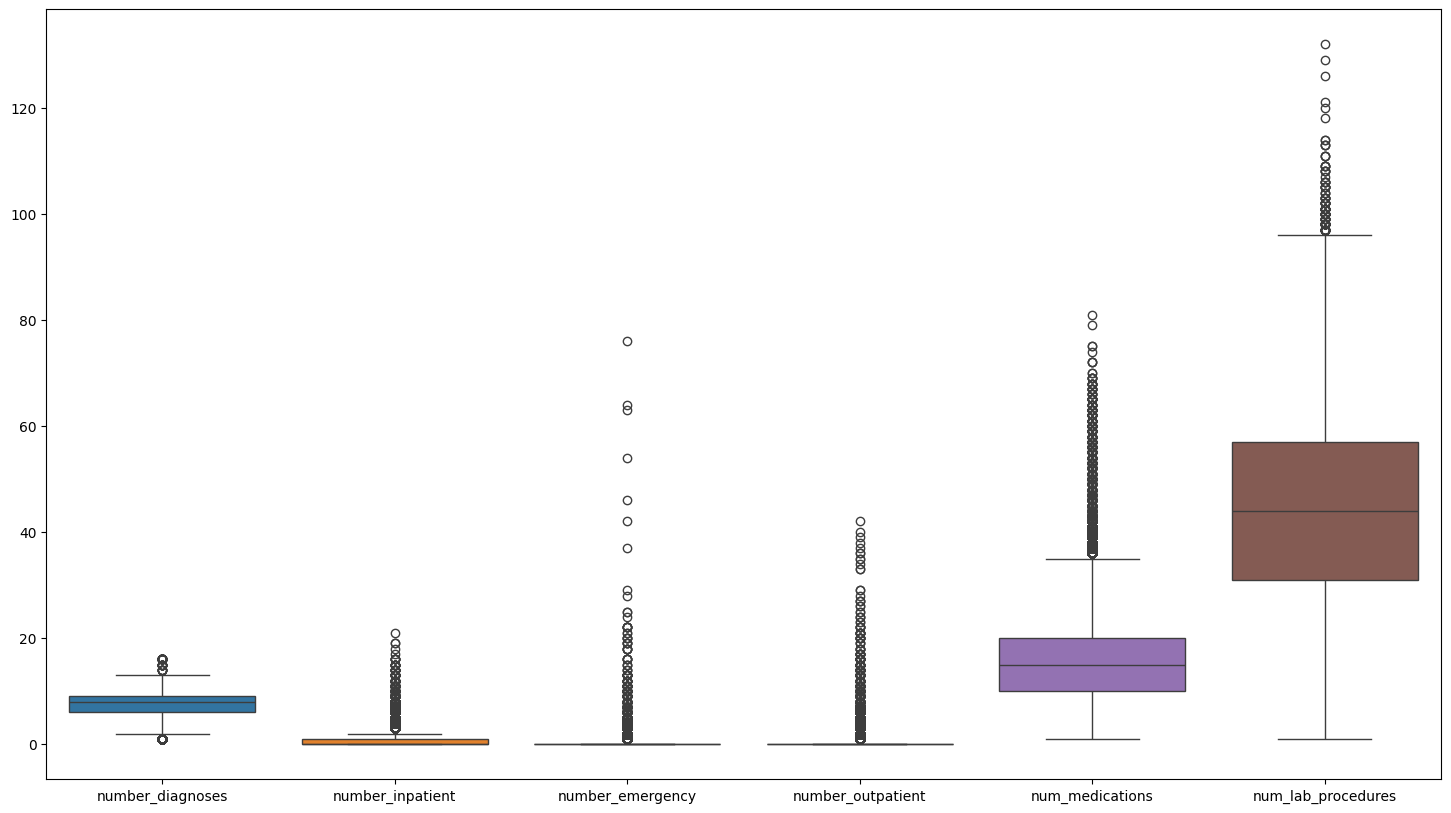

In [149]:
plt.figure(figsize=(18,10))
sns.boxplot(numerical_outliers)
plt.show()

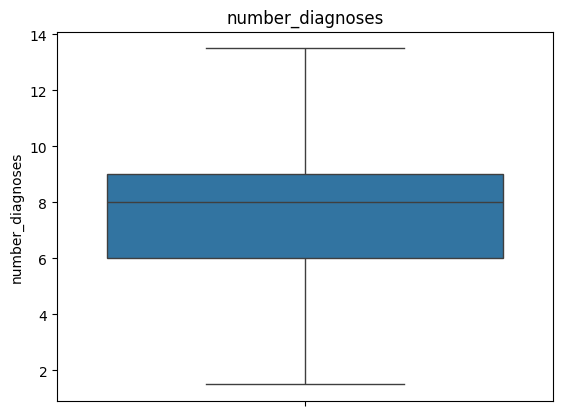

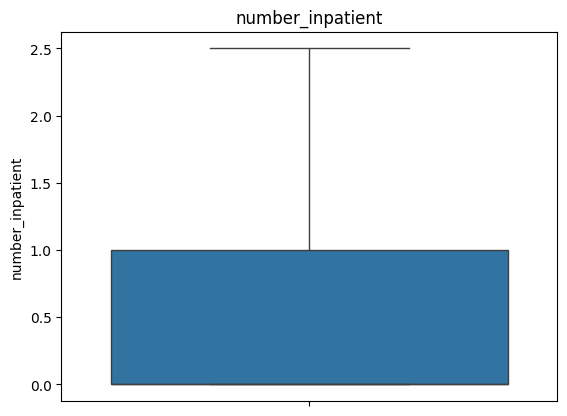

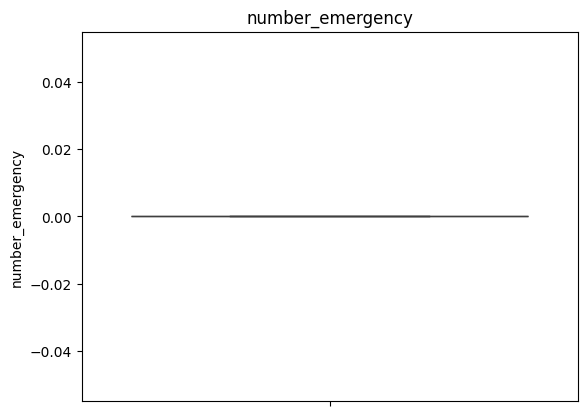

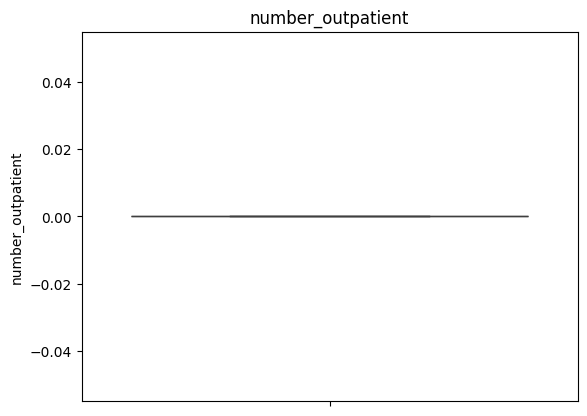

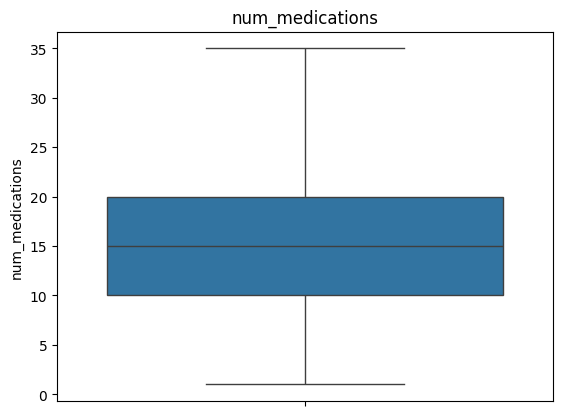

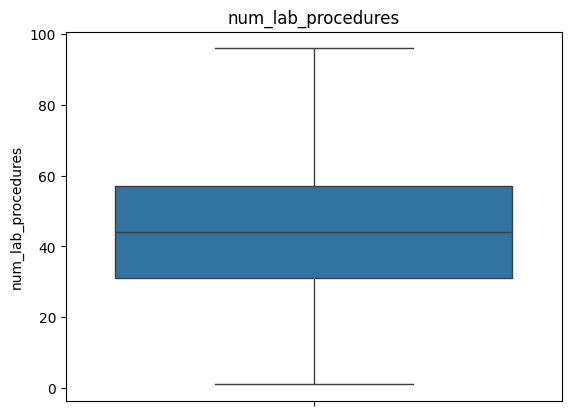

In [150]:
#Treating outliers using IQR method
def outlier(i):
    Q1=df_new[i].astype(np.float32).quantile(0.25)
    Q3=df_new[i].astype(np.float32).quantile(0.75)
    IQR=Q3-Q1
    df_new.loc[(df_new[i]>(Q3+1.5*IQR)),i]=(Q3+1.5*IQR)
    df_new.loc[(df_new[i]<(Q1-1.5*IQR)),i]=(Q1-1.5*IQR)
    sns.boxplot(df_new[i])
    plt.title(i)
    plt.show()
    return
outlier('number_diagnoses')
outlier('number_inpatient')
outlier('number_emergency')
outlier('number_outpatient')
outlier('num_medications')
outlier('num_lab_procedures')

Outliers of the numerical columns are removed and replaced


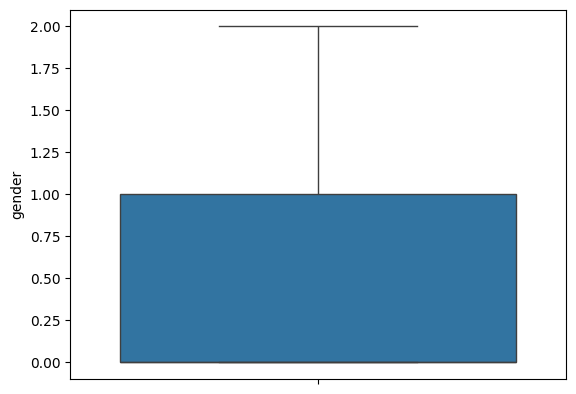

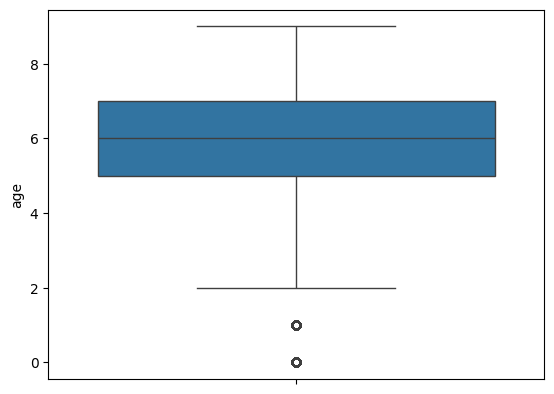

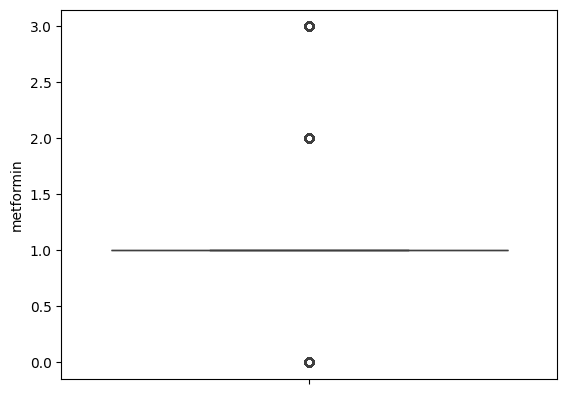

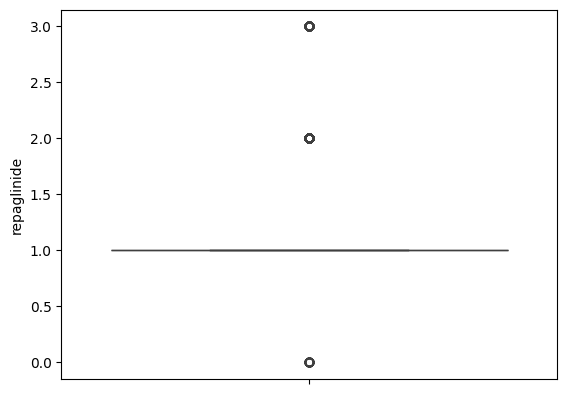

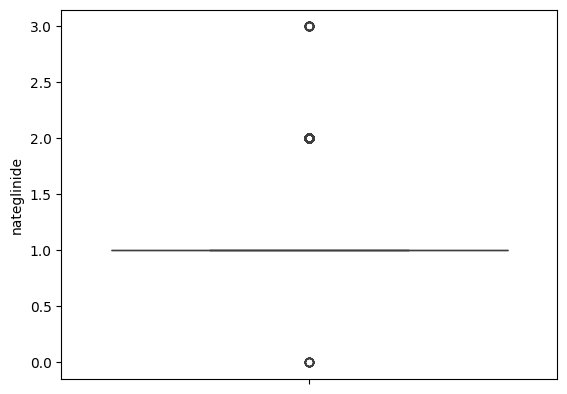

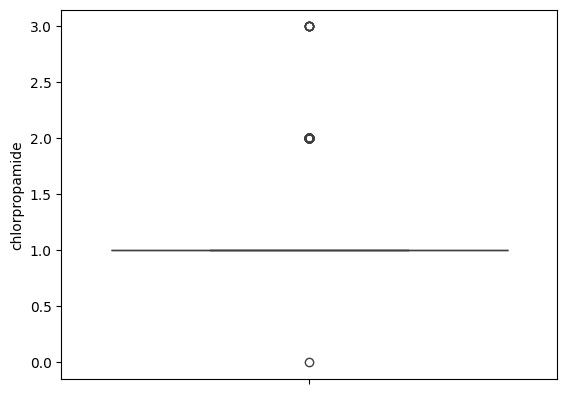

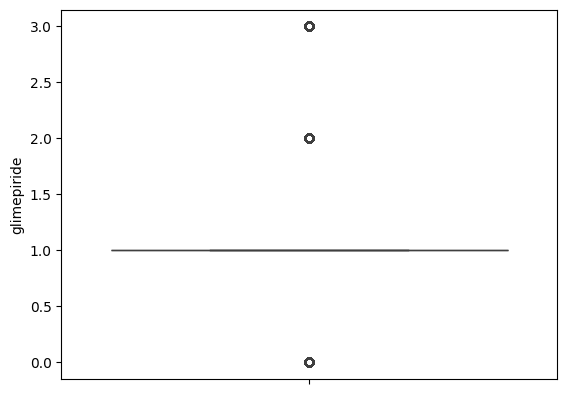

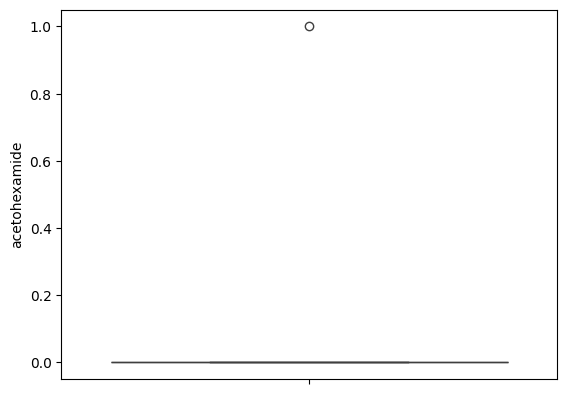

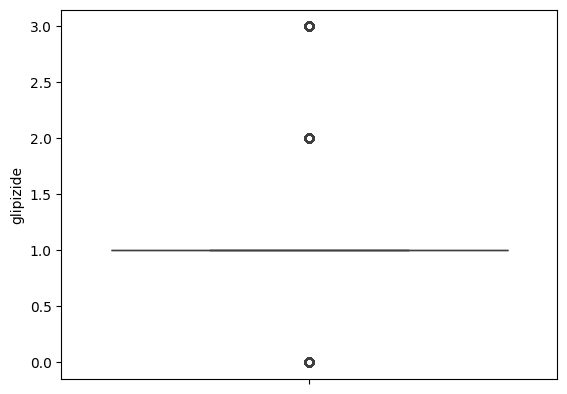

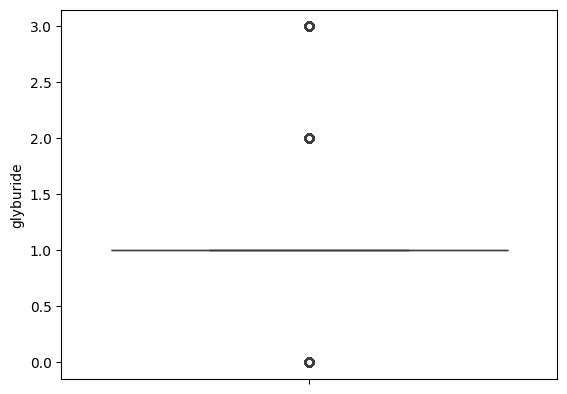

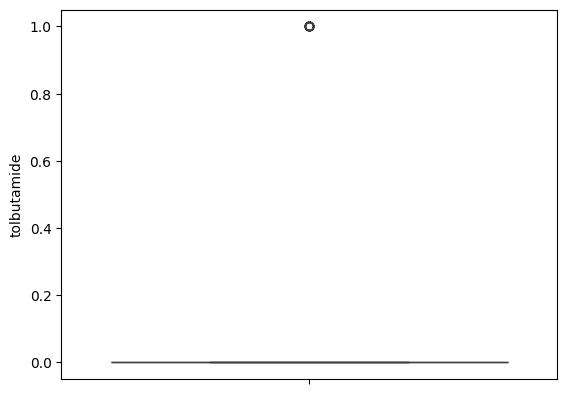

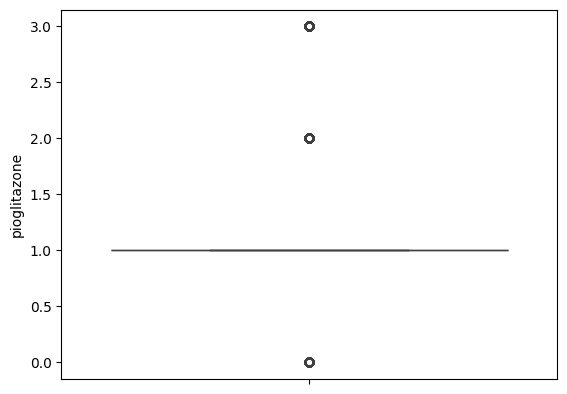

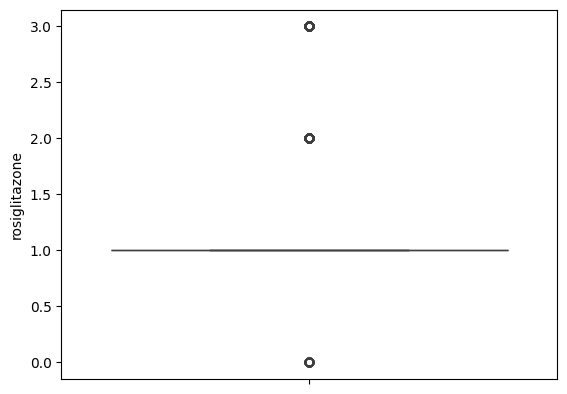

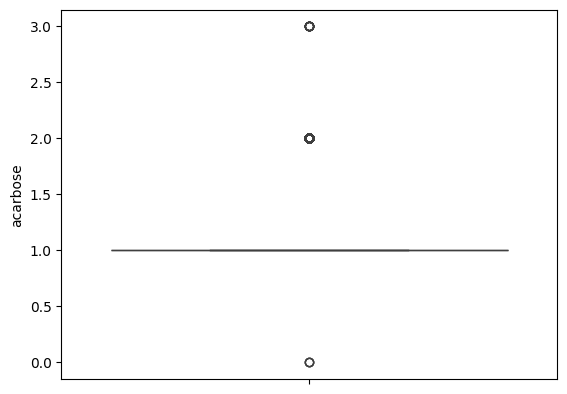

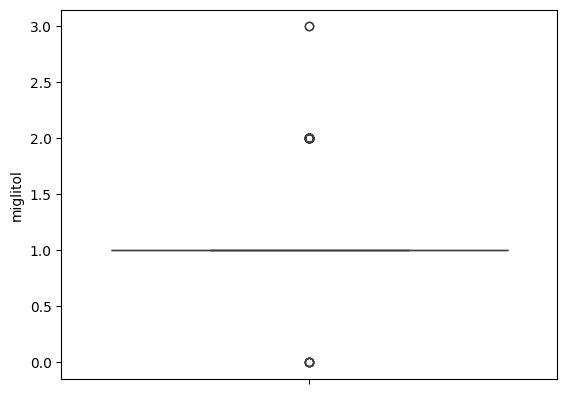

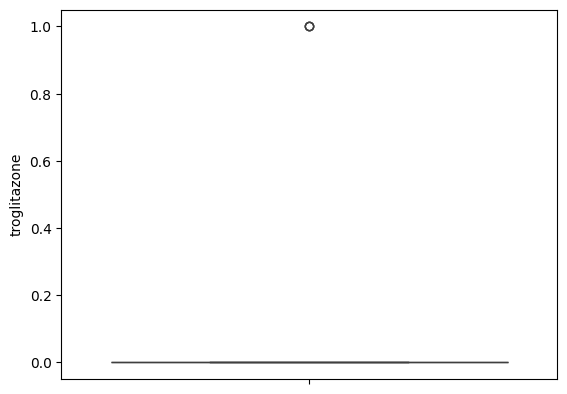

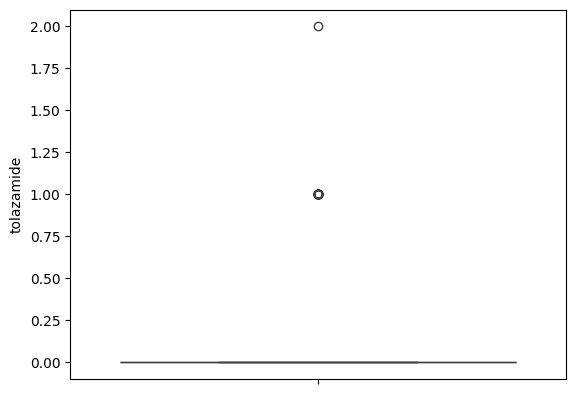

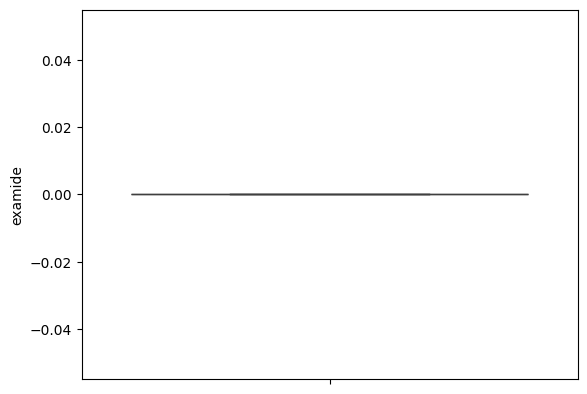

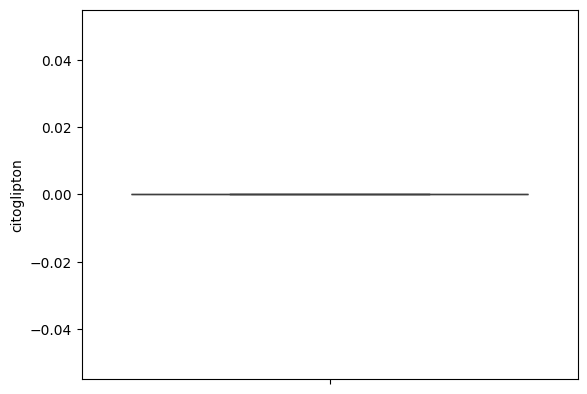

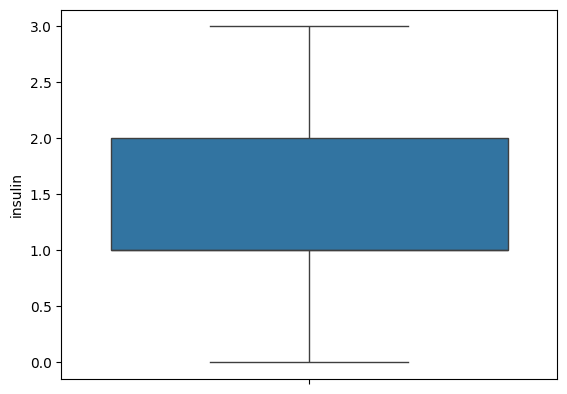

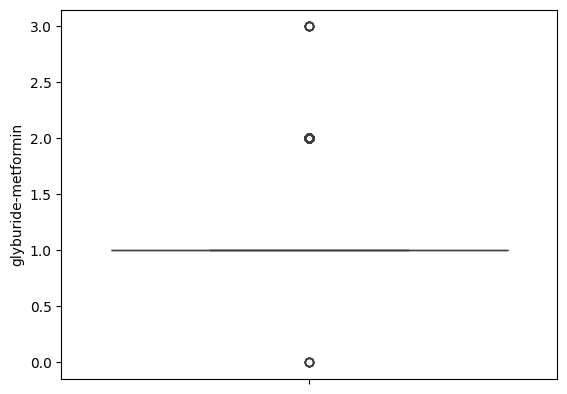

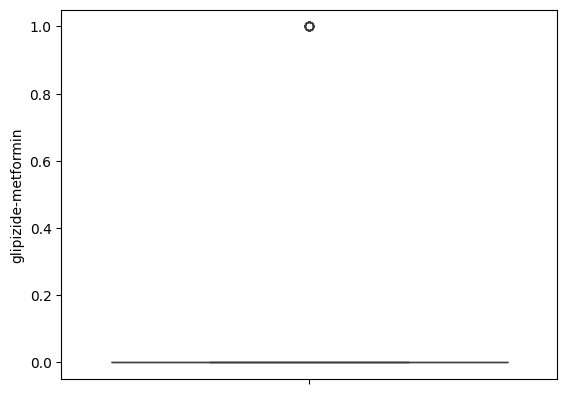

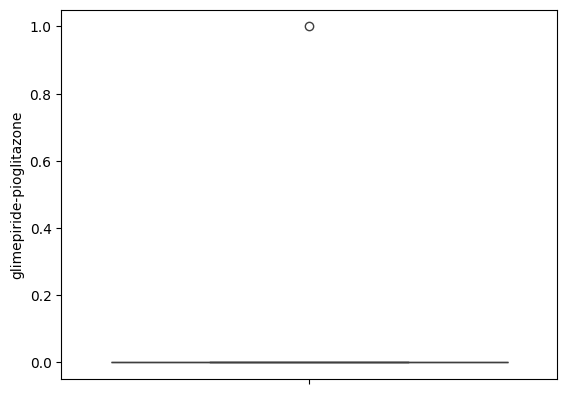

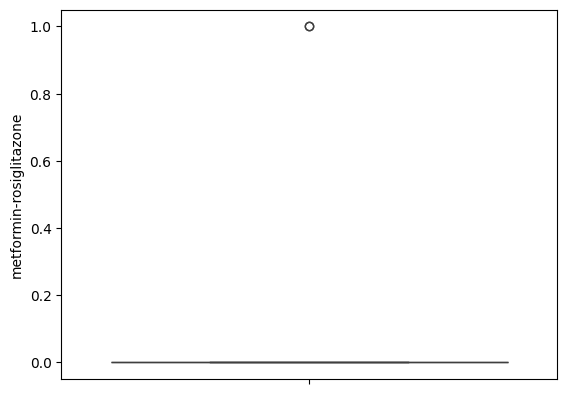

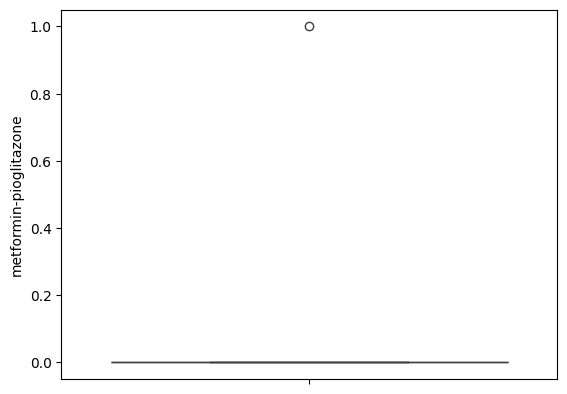

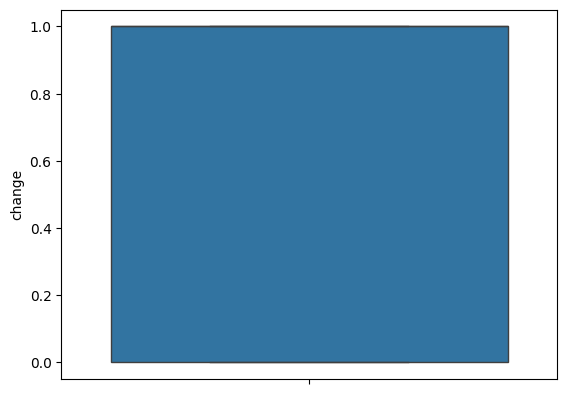

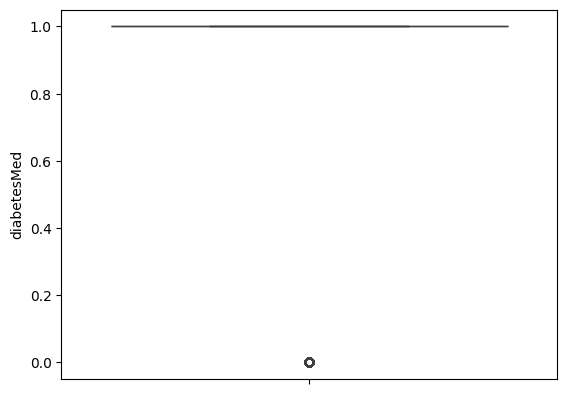

In [151]:
#Checking outliers of categorical features using boxplot
def label(i):
    sns.boxplot(df_new[i])
    plt.show()
    return
label('gender')
label('age')
label('metformin')
label('repaglinide')
label('nateglinide')
label('chlorpropamide')
label('glimepiride')
label('acetohexamide')
label('glipizide')
label('glyburide')
label('tolbutamide')
label('pioglitazone')
label('rosiglitazone')
label('acarbose')
label('miglitol')
label('troglitazone')
label('tolazamide')
label('examide')
label('citoglipton')
label('insulin')
label('glyburide-metformin')
label('glipizide-metformin')
label('glimepiride-pioglitazone')
label('metformin-rosiglitazone')
label('metformin-pioglitazone')
label('change')
label('diabetesMed')


There is no major outliers in the **categorical variables** of the dataset

In [152]:
df_new

,gender,age,num_lab_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,0,41,1,0,0,0.0,1.5,1,1,...,0,1,1,0,0,0,0,1,0,2
1,0,1,59,18,0,0,0.0,9.0,1,1,...,0,3,1,0,0,0,0,0,1,1
2,0,2,11,13,0,0,1.0,6.0,1,1,...,0,1,1,0,0,0,0,1,1,2
3,1,3,44,16,0,0,0.0,7.0,1,1,...,0,3,1,0,0,0,0,0,1,2
4,1,4,51,8,0,0,0.0,5.0,1,1,...,0,2,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,7,51,16,0,0,0.0,9.0,2,1,...,0,0,1,0,0,0,0,0,1,1
101762,0,8,33,18,0,0,1.0,9.0,1,1,...,0,2,1,0,0,0,0,1,1,2
101763,1,7,53,9,0,0,0.0,13.0,2,1,...,0,0,1,0,0,0,0,0,1,2
101764,0,8,45,21,0,0,1.0,9.0,1,1,...,0,3,1,0,0,0,0,0,1,2


# <font color="#4863A0"> Data Preprocessing 👨‍💻</font>

## <font size="4" face="WildWest">1. Splitting data into "Features" - "Target"</font>

In [154]:
#Features 'inputs' X
X=df_new.drop(columns=['readmitted'])
# Target variable "Outputs" (Y)
Y=df_new['readmitted']
#shape of X & Y to verify the splitting
print('Shape of X:',X.shape)
print('Shape of Y:',Y.shape)

Shape of X: (101766, 33)
Shape of Y: (101766,)


##### Splitting into Training -Testing data

In [155]:
# Split the data into training and testing sets
# X: Features, Y: Target variable
# test_size=0.2 specifies that 20% of the data will be used for testing and 80% for training
# random_state=0 sets the random seed for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Print the shapes of the training and testing sets to verify the splitting
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (81412, 33)
Shape of X_test: (20354, 33)
Shape of Y_train: (81412,)
Shape of Y_test: (20354,)
